In [1]:
import math
import numpy as np

# importing Qiskit
import qiskit as q
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, assemble, transpile
from qiskit.visualization import plot_histogram, plot_bloch_multivector

# import basic plot tools
from qiskit.visualization import plot_histogram

qasm_sim = q.Aer.get_backend('qasm_simulator')
statevec_sim = q.Aer.get_backend("statevector_simulator")

In [4]:
balanced_oracle = QuantumCircuit(2)
balanced_oracle.barrier()
balanced_oracle.cx(0, 1)
balanced_oracle.draw("mpl")

<Figure size 287.294x200.667 with 1 Axes>

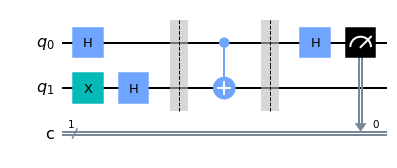

In [5]:
circuit = QuantumCircuit(2, 1)
circuit.h(0)
circuit.x(1)
circuit.h(1)
circuit.compose(balanced_oracle, inplace= True)
circuit.barrier()
circuit.h(0)
circuit.measure([0], [0])
circuit.draw("mpl")

In [8]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= (3) and
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

ibmqfactory.load_account:WARNING:2022-08-21 10:53:55,278: Credentials are already in use. The existing account in the session will be replaced.


least busy backend:  ibmq_belem


In [9]:
from qiskit.tools.monitor import job_monitor

transpiled_dj_circuit = transpile(circuit, backend, optimization_level=3)
job = backend.run(transpiled_dj_circuit)
job_monitor(job, interval=2)

AttributeError: 'function' object has no attribute 'reduce'